# Portfolio de Darwins, Que sobreviva el mejor!

# Este blog **NO** fomenta la inversion en Darwinex, consideramos que es un producto con demasiados riesgos para el inversor retail, basado en promesas de pago y apuntes contables. Pero si aun asi, te resulta interesante, deberias entender bien el subyacente de los darwins y al mismo tiempo conocer el darwin de verdad. 


&nbsp;





### Darwinex es un arma de doble filo, sirve tanto para dar vida y salidas a los gestores profesionales, o gente realmente cualificada, y tambien sirve para dar cobertura legal a toda clase de estafas y engañifas. Este articulo esta totalmente sesgado bajo mi criterio o mi experiencia personal, pero es la tonica general que se vive. 

&nbsp;



### Los darwins utilizados para analizar el portfolio que consideraremos como bueno, han sido  **SYO - THA - ZVQ - LVS**
### Los darwins utilizados para analizar el portfolio que consideraremos como basura han sido  **BAS - CQY - EZN - HSM** 

&nbsp;





### Los darwins considerados basura, los he considerado por el siguiente criterio: Captacion en Telegram o demas redes sociales, tratarse de influencers- alumnos de influencers , o gente sin criterio ninguno , mas que "cuatro lineas mal tiradas, y gestionando el calzoncillos desde su casa "


&nbsp;


### Hay que dejar claro, que personalmente solo conozco al gestor de SYO, que es una INSTITUCION en el mundo del la gestion, deberia ser la referencia para toda la comunidad Darwinex. 

&nbsp;



### Y esto no lo hago por hateo a nadie, simplemente, por que cuando un **INVERSOR** añade dinero a su cuenta de DARWINEX para obtener una gestion patrimonial, es **CAPITAL** que deja de **consumir** en el **presente**, para poder **disfrutar de una prima en el futuro** , la **RENTABILIDAD**. Invertir en productos, como los que catalogamos en el porfolio basura, son un **COSTE DE OPORTUNIDAD**, y sin contar que dejamos las cosas al azar y demas factores 

&nbsp;

### Una vez dejado claro el contexto, vamos a ponernos a lo que mas nos gustsa, el codigo el codigo!

# Cargamos todas las librerias necesarias para nuestro creador de carteras

In [38]:
import empyrical as ep
import pandas as pd 
import datetime
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import sys, os
import seaborn as sns
from plotly import graph_objects as go

%matplotlib inline
mpl.rcParams['figure.dpi']= 300
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_style("whitegrid")
sns.set_palette("Paired")
pylab.rcParams['figure.figsize'] = 16, 6


# Parte 1. Darwins Buenos.


&nbsp;

## ¿Realmente buenos?
### Retornos pasados **NO** garantizan retornos futuros, pero si que se puede hacer "arqueologia" sobre lo que hicieron, 

### Consideramos que cada punto de variacion del darwin es 1 dolar, por simplificar

In [39]:
portfolio = {

    "guenos/SYO.CSV":1, # ruta/ficherodarwin.csv : nivel de apalancamiento del mismo.
    "guenos/THA.csv":1,
    "guenos/ZVQ.csv":1,
    "guenos/LVS.csv":1
}


# Creamos un dataframe con todos los darwins, y ademas los sumamos para poder meterle manos a los datos

In [40]:
df_sessionlogs = {}

for informe_path in portfolio:
    multiplicador = portfolio[informe_path]
    df = pd.read_csv(informe_path,parse_dates=True,index_col=['Date'])
    df["Price"] = df["Price"] * multiplicador
    df_sessionlogs[informe_path] = df

In [41]:
df_portfolio = None

for informe_path in df_sessionlogs:
    if df_portfolio is None:
        df_portfolio = df_sessionlogs[informe_path]
        df_portfolio.columns = [informe_path]
    else:
        df_portfolio = df_portfolio.join(df_sessionlogs[informe_path].rename(columns={
            "Price":informe_path
        })).fillna(0)
        
# Creamos la columna total con el PyG del portfolio
df_portfolio["total"] = df_portfolio.sum(axis=1)

# Ahora vamos a calcular el capital minimo con el que entrar en el portfolio, No es la forma optima, pero si una aproximacion

In [42]:
# Calculamos la peor sesion
peor_sesion = df_portfolio["total"].min()

# Calculamos el peor DD
cumulative = df_portfolio["total"].cumsum().values
max_return = np.fmax.accumulate(cumulative)
peor_drawdown = np.nanmin(cumulative - max_return)

# Utilizamos una formula "inventada" para llegar a un capital minimo aceptable. 
capital_sugerido = abs(round(min(5*peor_drawdown,15*peor_sesion),0))

# Creamos el DF con la informacion necesaria, y lo mostramos
df_estadisticas = pd.DataFrame.from_dict({
    "Peor Sesion": peor_sesion,
    "Peor Drawdown": peor_drawdown,
    "Capital Necesario": capital_sugerido
},"index")

df_estadisticas.columns = ["Darwins Buenos"]

# Vemos que los DDs existen, y necesitamos protegernos de no ser **FULMINADOS** por el mercado

In [43]:
df_estadisticas

,Darwins Buenos
Peor Sesion,-45.570
Peor Drawdown,-117.900
Capital Necesario,684.000


# Calculamos los retornos del portfolio, y el resto de estadisticas, para poder analizarlo

In [44]:
df_returns = (df_portfolio["total"].cumsum() + capital_sugerido).pct_change().dropna() # retornos en $ + capital sugerido

In [50]:
df_performance = pd.DataFrame.from_dict({
    "PyG": df_portfolio["total"].cumsum().values[-1],
    "Sesiones Analizadas": len(df_portfolio),
    "Sesiones Ganadoras (%)": 100 * len(df_portfolio[df_portfolio["total"]>0]) /  len(df_portfolio[df_portfolio["total"]!=0]),
    "ROI Anualizado": 100 * ep.annual_return(df_returns),
    "CAGR" :  100 * ep.cagr(df_returns),
    "Volatilidad Anualizada": 100 *  ep.annual_volatility(df_returns),
    "Profit Factor":  df_returns[df_returns > 0].sum() / abs(df_returns[df_returns < 0].sum()),
    "Promedio Sesion Ganadora":  df_portfolio[df_portfolio["total"] > 0]["total"].mean(),
    "Promedio Sesion Perdedora":  df_portfolio[df_portfolio["total"] < 0]["total"].mean(),
    "Ratio Sharpe": ep.sharpe_ratio(df_returns),
    "Ratio Sortino": ep.sortino_ratio(df_returns),
    "Ratio Calmar" :  ep.calmar_ratio(df_returns),
    "Tail Ratio" : ep.tail_ratio(df_returns),
    "Omega Ratio" : ep.omega_ratio(df_returns),
    "Peor Sesion": peor_sesion,
    "Peor Drawdown": peor_drawdown,
    "Min Bankroll NoBust": capital_sugerido,
    "VAR95%" : ep.value_at_risk(df_returns,0.95),
},"index")

df_performance.columns = ["Portfolio Bueno"]

# Analizamos los resultados del Portfolio Bueno.

In [51]:
df_performance

,Portfolio Bueno
PyG,1335.560
Sesiones Analizadas,685.000
Sesiones Ganadoras (%),57.810
ROI Anualizado,49.201
CAGR,49.201
Volatilidad Anualizada,14.493
Profit Factor,1.695
Promedio Sesion Ganadora,9.071
Promedio Sesion Perdedora,-7.809
Ratio Sharpe,2.835


# Conclusiones del Portfolio Bueno

&nbsp;

&nbsp;

### Con un 55% de sesiones ganadoras, y un promedio de 64 puntos por sesion ganadora, no hay mucho mas que decir, es **RENTABLE**.

&nbsp;

### En este caso Darwinex es un **BUENO** para la comunidad de inversores. Con unos ratios Sharpe de casi 3, un Sortino de 5 y un Calmar de 6, no puedo criticar nada de este porfolio, 

&nbsp;

### Hacer especial enfasis, en que ganan 3.252 veces mas que el siguiente porfolio que analizaremos, el de los malos.



# Vamos a plotear las curvas de equity por si alguien aun no se ha enterado....

In [ ]:
fig = plt.figure(figsize=(22,9))

plt.plot(df_portfolio.drop("total", axis=1).cumsum())
plt.plot(df_portfolio["total"].cumsum(), linewidth=3);

leg = plt.legend(df_portfolio.columns.values)
plt.show()

# Ahora toca el turno del show. Los darwins que no son malos, son MALISIMOS

&nbsp;

### Si alguno se siente mal que su darwin salga aqui, solo tiene que comentarmelo por privado, asi me reire un rato, lo mejor que puede hacer es centrarse en la operativa, por que en esta lista hay darwins con mas de 140.000€ en inversion. 

## Repetimos el proceso anterior, esta vez con un portfolio, que podrias tener, si te hubieran captado en vivirdelforex (el famoso grupo de telegram), el señor Aker, o demas pseudotraders de internet.

In [27]:
vertedero = {

    "malos/BAS.CSV":1,
    "malos/CQY.csv":1,
    "malos/EZN.csv":1,
    "malos/HSM.csv":1
}


In [28]:
df_sessionlogs_vertedero = {}

for informe_path in vertedero:
    multiplicador = vertedero[informe_path]
    df = pd.read_csv(informe_path,parse_dates=True,index_col=['Date'])
    df["Price"] = df["Price"] * multiplicador
    df_sessionlogs_vertedero[informe_path] = df

In [29]:
df_portfolio_basurero = None

for informe_path in df_sessionlogs_vertedero:
    if df_portfolio_basurero is None:
        df_portfolio_basurero = df_sessionlogs_vertedero[informe_path]
        df_portfolio_basurero.columns = [informe_path]
    else:
        df_portfolio_basurero = df_portfolio_basurero.join(df_sessionlogs_vertedero[informe_path].rename(columns={
            "Price":informe_path
        })).fillna(0)

df_portfolio_basurero["total"] = df_portfolio_basurero.sum(axis=1)

In [30]:

peor_sesion_malo = df_portfolio_basurero["total"].min()


cumulative_malo = df_portfolio_basurero["total"].cumsum().values
max_return_malo = np.fmax.accumulate(cumulative_malo)
peor_drawdown_malo = np.nanmin(cumulative_malo - max_return_malo)


capital_sugerido_malo = abs(round(min(5*peor_drawdown_malo,15*peor_sesion_malo),0))


df_estadisticas_malas = pd.DataFrame.from_dict({
    "Peor Sesion": peor_sesion_malo,
    "Peor Drawdown": peor_drawdown_malo,
    "Capital Necesario": capital_sugerido_malo
},"index")

df_estadisticas_malas.columns = ["Darwins BASURA"]

df_estadisticas_malas

,Darwins BASURA
Peor Sesion,-29.160
Peor Drawdown,-79.550
Capital Necesario,437.000


In [52]:
df_returns_malo = (df_portfolio_basurero["total"].cumsum() + capital_sugerido_malo).pct_change().dropna()

df_performance_malo = pd.DataFrame.from_dict({
    "PyG": df_portfolio_basurero["total"].cumsum().values[-1],
    "Sesiones Analizadas": len(df_portfolio_basurero),
    "Sesiones Ganadoras (%)": 100 * len(df_portfolio_basurero[df_portfolio_basurero["total"]>0]) /  len(df_portfolio_basurero[df_portfolio_basurero["total"]!=0]),
    "ROI Anualizado": 100 * ep.annual_return(df_returns_malo),
    "CAGR" :  100 * ep.cagr(df_returns_malo),
    "Volatilidad Anualizada": 100 *  ep.annual_volatility(df_returns_malo),
    "Profit Factor":  df_returns_malo[df_returns_malo > 0].sum() / abs(df_returns_malo[df_returns_malo < 0].sum()),
    "Promedio Sesion Ganadora":  df_portfolio_basurero[df_portfolio_basurero["total"] > 0]["total"].mean(),
    "Promedio Sesion Perdedora":  df_portfolio_basurero[df_portfolio_basurero["total"] < 0]["total"].mean(),
    "Ratio Sharpe": ep.sharpe_ratio(df_returns_malo),
    "Ratio Sortino": ep.sortino_ratio(df_returns_malo),
    "Ratio Calmar" :  ep.calmar_ratio(df_returns_malo),
    "Tail Ratio" : ep.tail_ratio(df_returns_malo),
    "Omega Ratio" : ep.omega_ratio(df_returns_malo),
    "Peor Sesion": peor_sesion_malo,
    "Peor Drawdown": peor_drawdown_malo,
    "Min Bankroll NoBust": capital_sugerido_malo,
    "VAR95%" : ep.value_at_risk(df_returns_malo,0.95),
},"index")

df_performance_malo.columns = ["El Basurero"]

In [53]:
df_performance_malo

,El Basurero
PyG,-7.726
Sesiones Analizadas,595.000
Sesiones Ganadoras (%),50.673
ROI Anualizado,-0.714
CAGR,-0.714
Volatilidad Anualizada,14.802
Profit Factor,1.004
Promedio Sesion Ganadora,2.964
Promedio Sesion Perdedora,-3.071
Ratio Sharpe,0.026


# Hemos llegado a la miga, los ratios del portfolio basura, me podria poner a hacer daño gratuitamente , pero solo voy a comentar un poco y por encima los ratios mas llamativos.

&nbsp;

## Para empezar ganan solo el 50% de las veces, lo que yo llamo, **pure luck o random walk**, ademas cuando ganan es menos, que cuando pierden, estamos ante un claro ejemplo de un sistema perdedor, unas ventajas rotas, unos numeros de mierda, y UNA ESTAFA EN TODA REGLA. 

&nbsp;

## Un producto asi, no se lo desearia ni a mis peores enemigos, el coste de oportunidad de estar invertido en estos darwins, es altisimo, ademas sin contar que darwinex tiene un freno de mano, que hara que no se hundan en la miseria,  por que , seguro que la estrategia subyacente, funciona peor que el liquidativo del darwin.

&nbsp;

## Conclusion, ¿Que haces aqui invertido? **¿Acaso te gusta perder dinero?**

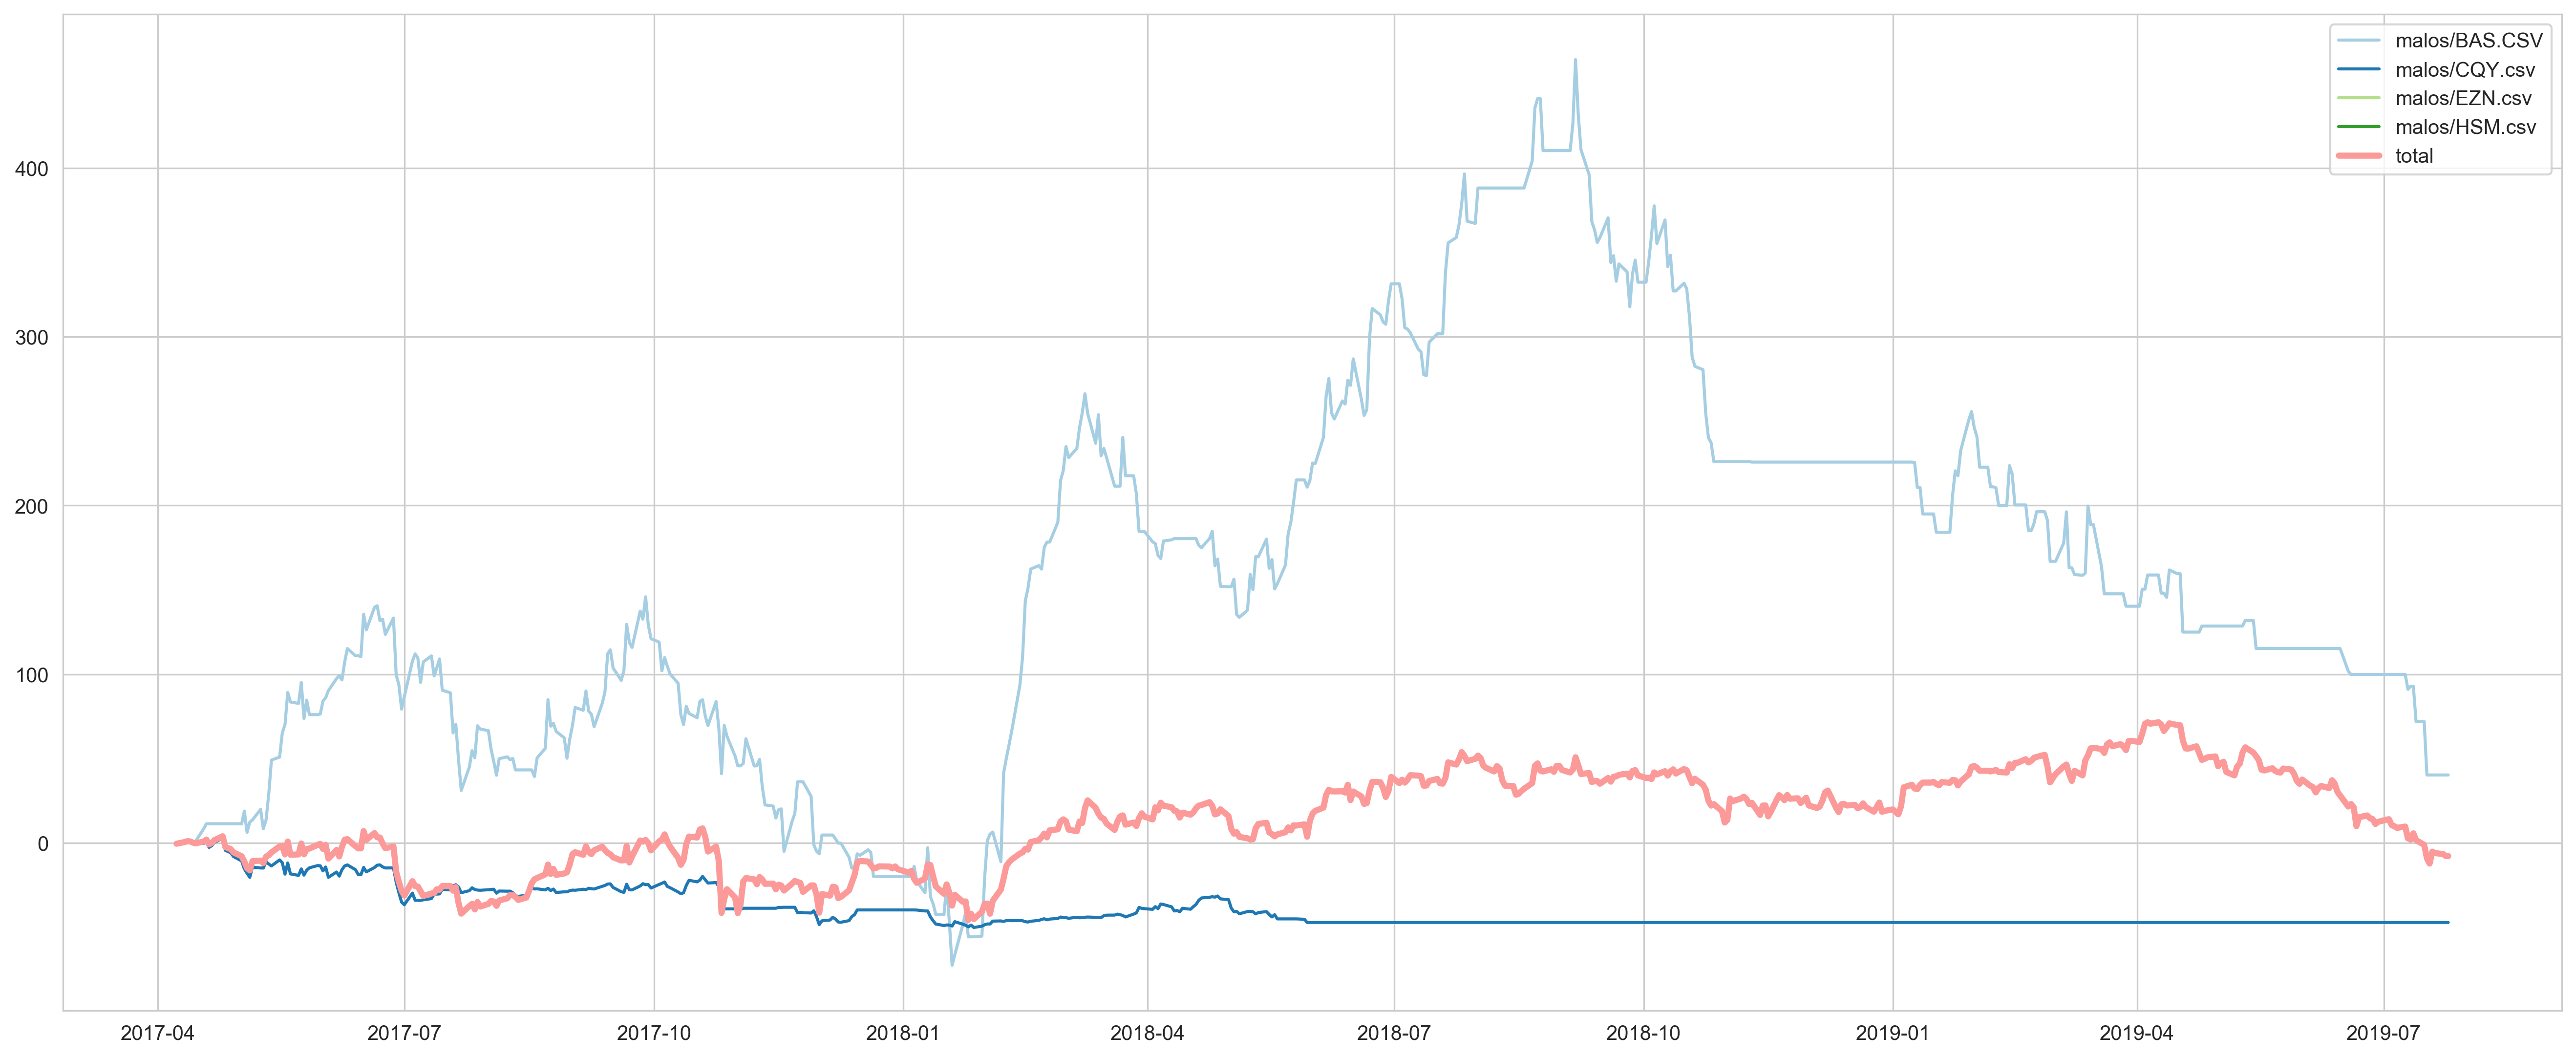

In [54]:
# Graficamos el portfolio
fig = plt.figure(figsize=(22,9))

plt.plot(df_portfolio_basurero.drop("total", axis=1).cumsum())
plt.plot(df_portfolio_basurero["total"].cumsum(), linewidth=3);

leg = plt.legend(df_portfolio_basurero.columns.values)
plt.show()